[  5.83640353  11.18116874  18.663063    29.14450427  42.65555466
  59.18594925  78.73030159 101.2867136  126.85294228 155.55724897]
[  5.83640313  11.18116742  18.66306113  29.14449547  42.65554554
  59.18589666  78.73024976 101.28608267 126.85210998 155.42762815]


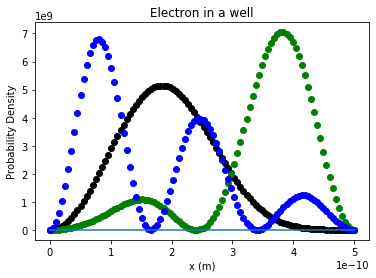

In [13]:
#Exercise 6.9
from scipy import pi, empty, dot, sqrt, linspace, array, sin
from scipy.linalg import eigh, eigvalsh
import numpy as np 
import matplotlib.pyplot as plt 

# Constants
hbar = 6.582119514 * 10 ** -16 # in J * s
L = 5 * 10 ** -10 # in m
M = 9.1094 * 10 ** -31 # in kg
a = 10 # in eV


def h(m, n):
    def is_same_parity(m, n):
        return m % 2 == n % 2
    if m == n:
        return (pi ** 2 * hbar ** 2 * n ** 2) / (2 * M * L ** 2) * (1.6022 * 10 ** -19) + a / 2
    elif not is_same_parity(m, n):
        return - 8 * a / (pi ** 2)  * m * n / (m ** 2 - n ** 2) ** 2
    else:
        return 0


# Create H up to 10 x 10 elements
H = empty([ 10, 10 ], float)
for m in range(10):
    for n in range(10):
        H[m, n] = h(m + 1, n + 1)

E, psi = eigh(H)
print(E)

# Compare with 100 x 100
H = empty([ 100, 100 ], float)
for m in range(100):
    for n in range(100):
        H[m, n] = h(m + 1, n + 1)

E, psi = eigh(H)
print(E[:10])

# plot three lowest energy states

def V(x):
    return a * x / L

def psi_n(n, x):
    psi0 = 0
    for m in range(100):
        psi0 += sqrt(2 / L) * psi[n][m] * sin(pi * (m+1) * x / L)
    return psi0

def psi_0(x):
    return psi_n(0, x)

def psi_1(x):
    return psi_n(1, x)

def psi_2(x):
    return psi_n(2, x)

def square(x):
    return x ** 2

x = np.linspace(0, L, 100)
v = list(map(V, x))
psi0 = np.array(list(map(psi_0, x)))
psi1 = np.array(list(map(psi_1, x)))
psi2 = np.array(list(map(psi_2, x)))
psi0_squared = list(map(square, psi0))
psi1_squared = list(map(square, psi1))
psi2_squared = list(map(square, psi2))
plt.plot(x, psi0_squared, 'ko')
plt.plot(x, psi1_squared, 'go')
plt.plot(x, psi2_squared, 'bo')
plt.plot(x, v)
plt.xlabel('x (m)')
plt.ylabel('Probability Density')
plt.title('Electron in a well')
plt.show()

a. $$\psi (x) = \sum^\infty_{n=1} \psi_n sin(\frac{\pi n x}{L})$$ $$\bar{H} = \frac{-\hbar^2}{2m} \frac{d^2}{dx^2}+V(x)$$ Therefore, $\bar{H}\psi(x)=E\psi(x)$ is $$\sum^\infty_{n=1}\psi_n [\frac{\hbar^2}{2m}(\frac{n^2\pi^2}{L^2})\frac{2}{L}sin(\frac{n\pi x}{L})+V(x)][\frac{2}{L}sin(\frac{n\pi x}{L})]=E[\sum^\infty_{n=1}\psi_n sin(\frac{n\pi x}{L})]$$ $$\psi_m \frac{\hbar^2}{2m} (\frac{n\pi}{L})^2 + \sum^\infty_{n=1} \psi_n \frac{2}{L} \int_0^L dx sin(\frac{m\pi x}{L}) V(x) sin(\frac{n\pi x}{L})=E\psi_m$$ $$\sum^\infty_{n=1} \psi_n \frac{2}{L} \int_0^\infty sin(\frac{m\pi x}{L})\bar{H} sin(\frac{n\pi x}{L}) = E\psi_m$$ $$\sum^\infty_{n=1} \psi_n H_{mn} = E \psi_m$$
<br/> c. The starting value of the array, or ground-state energy, is 5.84eV.
<br/> d. Comparing the 100x100 array to the 10x10 array calculations, I can conclude that the 100x100 array calculations are more accurate. This is because some values for the 100x100 array have more digits therefore a more accurate measurement. Also, generally the 100x100 array has smaller values. 
<br/> e. This is true of the wavefunction because the probability density is positive for all three curves.